##PCA: 차원 축소 기법
 - Feature 개수를 줄인다.
 - 주요 특징들의 대푯값을 손실하지 않고 유지
 - 계산 비용 감소
 - 사람이 이해하기 쉬워짐 (2차원으로 보면,,)

## IRIS 데이터를 이용한 PCA

## 1. Data Load

In [6]:
from sklearn.datasets import load_iris

In [7]:
import pandas as pd
df = pd.DataFrame(load_iris()["data"], columns=load_iris()["feature_names"])

In [8]:
target = load_iris()["target"]

## 2. PCA 적용

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
data = pca.fit_transform(df)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

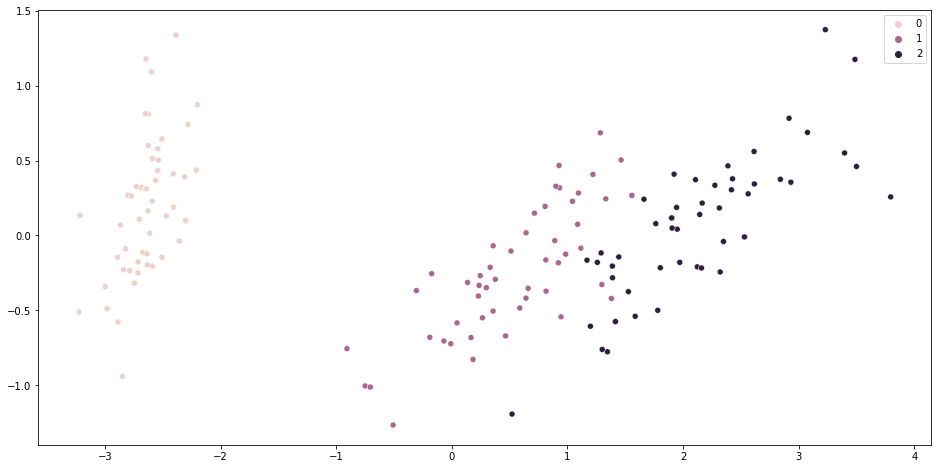

In [13]:
plt.figure(figsize=(16, 8))
##시험 [:, 0]
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=target)

## 3. 데이터 분할

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2)

In [16]:
train_input.shape

(120, 2)

In [17]:
test_input.shape

(30, 2)

In [18]:
##시험
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(train_input, train_target)

SVC()

In [19]:
model.score(test_input, test_target)

0.9

## MNIST data를 활용한 PCA

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
data = digits['data']
target = digits['target']

In [22]:
data.shape

(1797, 64)

In [23]:
data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

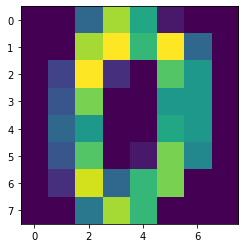

In [24]:
plt.imshow(data[0].reshape(8, 8))

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
scaled = scaler.fit_transform(data)

In [28]:
scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [29]:
pca_mnist = PCA(n_components=10)

In [30]:
data_pca = pca_mnist.fit_transform(scaled)

In [31]:
data_pca[0]

array([ 0.06113694,  1.37810861, -0.53876146,  0.80786041, -0.43921008,
       -0.4679395 ,  0.20240519,  0.14048345, -0.04299247,  0.22644861])

In [32]:
x_train, x_test, y_train, y_test = train_test_split(data_pca, target, test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
rf.score(x_test, y_test)

0.9638888888888889

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


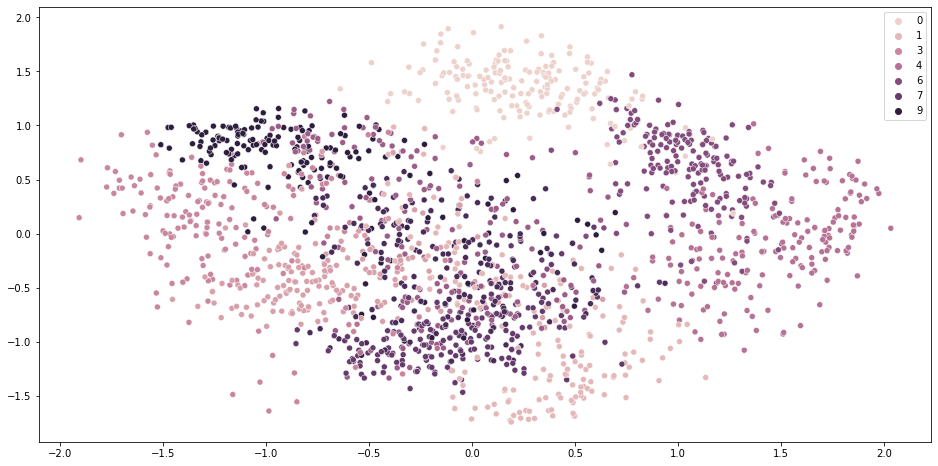

In [36]:
plt.figure(figsize=(16,8))
sns.scatterplot(data_pca[:,0], data_pca[:, 1], hue=target)